In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
file_list=glob.glob('*.csv')
file_list

['decimal_benign.csv',
 'decimal_DoS.csv',
 'decimal_spoofing-GAS.csv',
 'decimal_spoofing-RPM.csv',
 'decimal_spoofing-SPEED.csv',
 'decimal_spoofing-STEERING_WHEEL.csv']

In [3]:
dataframe=[]
for file in file_list:
    df=pd.read_csv(file)
    dataframe.append(df)
df=pd.concat(dataframe,ignore_index=True)
df=df.to_csv('IDS.csv',index=False)

In [4]:
df=pd.read_csv('IDS.csv')
df.head(10)

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
0,65,96,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
1,1068,132,13,160,0,0,0,0,0,BENIGN,BENIGN,BENIGN
2,535,127,255,127,255,127,255,127,255,BENIGN,BENIGN,BENIGN
3,131,15,224,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
4,936,1,0,39,16,0,0,0,0,BENIGN,BENIGN,BENIGN
5,359,0,128,0,0,0,1,227,0,BENIGN,BENIGN,BENIGN
6,369,16,108,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
7,516,192,0,125,0,0,0,0,0,BENIGN,BENIGN,BENIGN
8,609,0,0,9,0,0,0,0,0,BENIGN,BENIGN,BENIGN
9,1071,125,4,0,2,113,0,0,0,BENIGN,BENIGN,BENIGN


In [5]:
df['label'].value_counts()

label
BENIGN    1223737
ATTACK     184482
Name: count, dtype: int64

In [6]:
df['label']=(df['label']=='ATTACK').astype(int)
df
#binary classification for ATTACK->1 and  BENIGN ->0

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
0,65,96,0,0,0,0,0,0,0,0,BENIGN,BENIGN
1,1068,132,13,160,0,0,0,0,0,0,BENIGN,BENIGN
2,535,127,255,127,255,127,255,127,255,0,BENIGN,BENIGN
3,131,15,224,0,0,0,0,0,0,0,BENIGN,BENIGN
4,936,1,0,39,16,0,0,0,0,0,BENIGN,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...
1408214,128,132,3,2,35,24,5,138,34,1,SPOOFING,STEERING_WHEEL
1408215,128,132,3,2,35,24,5,138,34,1,SPOOFING,STEERING_WHEEL
1408216,128,132,3,2,35,24,5,138,34,1,SPOOFING,STEERING_WHEEL
1408217,128,132,3,2,35,24,5,138,34,1,SPOOFING,STEERING_WHEEL


In [7]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.drop(columns=['category','specific_class'],inplace=True)

In [8]:
df

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label
0,65,96,0,0,0,0,0,0,0,0
1,1068,132,13,160,0,0,0,0,0,0
2,535,127,255,127,255,127,255,127,255,0
3,131,15,224,0,0,0,0,0,0,0
4,936,1,0,39,16,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3583,344,6,28,6,63,6,42,2,41,1
3584,513,0,0,0,0,100,0,2,0,1
3585,128,0,0,0,0,0,0,0,0,1
3586,128,132,3,2,35,24,5,138,34,1


In [9]:
df.label.value_counts()

label
0    3547
1      41
Name: count, dtype: int64

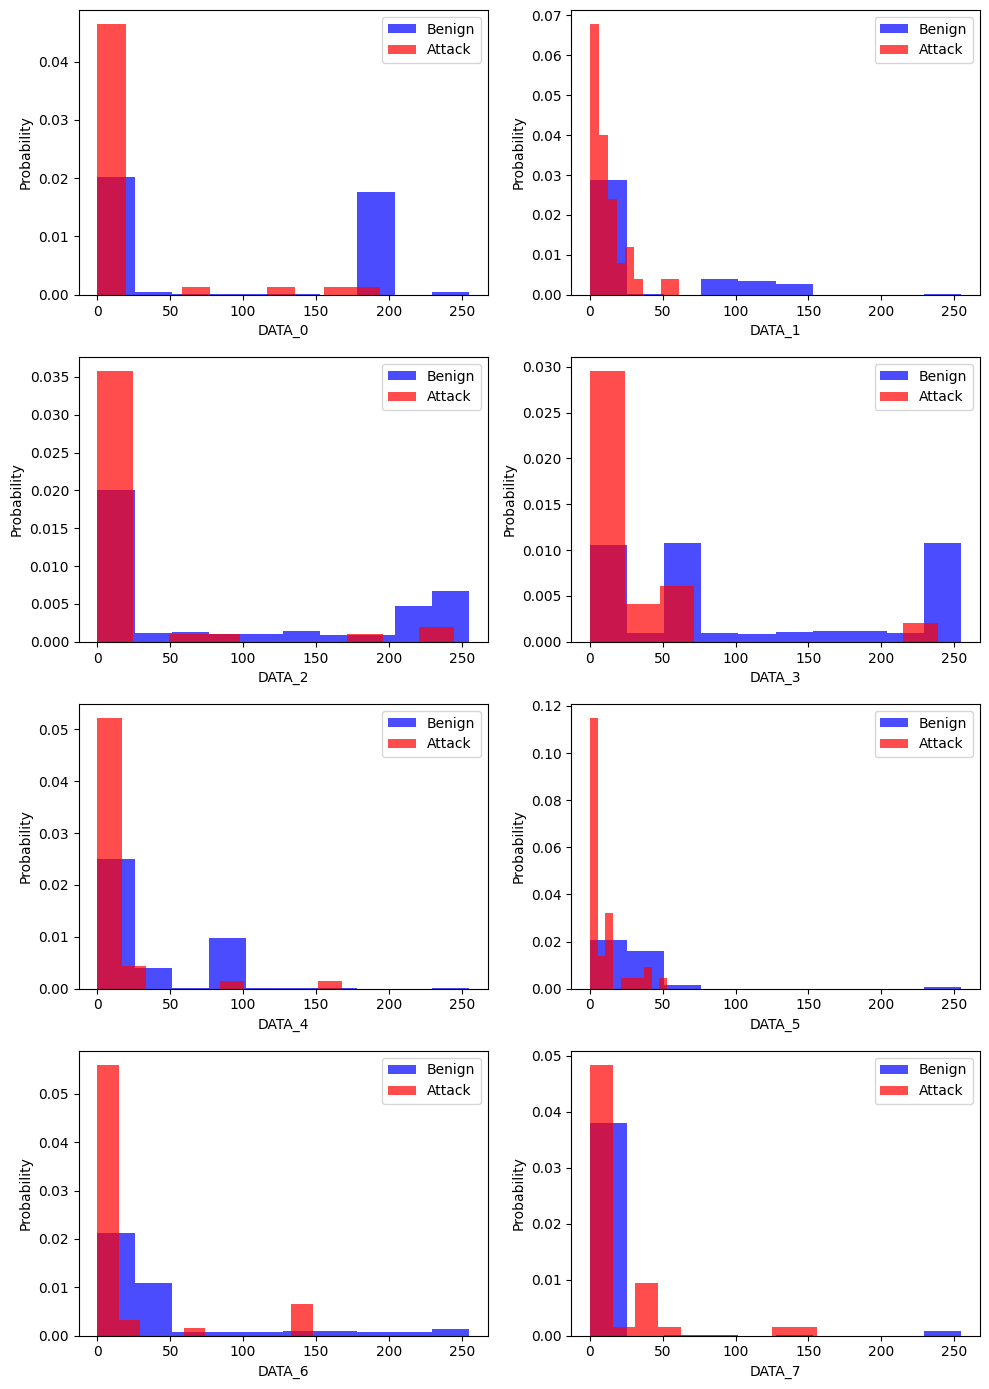

In [10]:
# Get the columns except the first and last one
cols = df.columns[1:-1]

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(10, 14))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate over columns and plot histograms
for i, col in enumerate(cols):
    # Plot benign data
    axes[i].hist(df[df['label'] == 0][col], color='blue', density=True, alpha=0.7, label='Benign')
    # Plot attack data
    axes[i].hist(df[df['label'] == 1][col], color='red', density=True, alpha=0.7, label='Attack')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Probability')
    axes[i].legend()
    
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the plot
plt.show()

In [11]:
X = df.drop(columns=['label'])
y = df['label']
# Split data into train and test sets
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['label'] = y_resampled

# Save the resampled dataset to a new CSV file
resampled_df.to_csv("balanced_IDS.csv", index=False)

df=pd.read_csv("balanced_IDS.csv")

X = df.drop(columns=['label'])
y = df['label']

In [12]:
df.label.value_counts()    #data is balanced

label
0    3547
1    3547
Name: count, dtype: int64

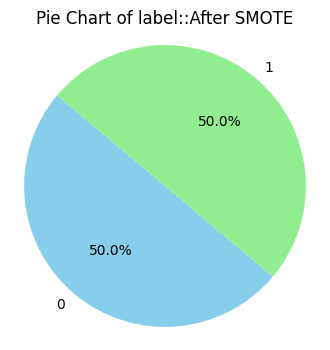

In [13]:
# df['label'].value_counts().plot(kind='pie')
category_counts = df['label'].value_counts()
colors = ['skyblue', 'lightgreen', 'orange']
# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title(f'Pie Chart of label::After SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.9990605918271489

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1077
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2129
   macro avg       1.00      1.00      1.00      2129
weighted avg       1.00      1.00      1.00      2129



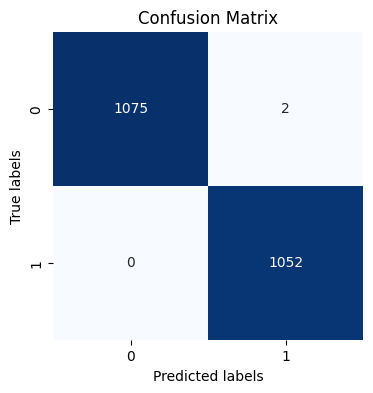

In [15]:
#applying support vector machine
svc=SVC()
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy1=[]
precision1=[]
recall1=[]
f1_score1=[]
algorithms=['SVM','Random Forest','KNN','Logistic Regression','Naive Bayes']

Accuracy: 0.9995302959135745

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1077
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2129
   macro avg       1.00      1.00      1.00      2129
weighted avg       1.00      1.00      1.00      2129



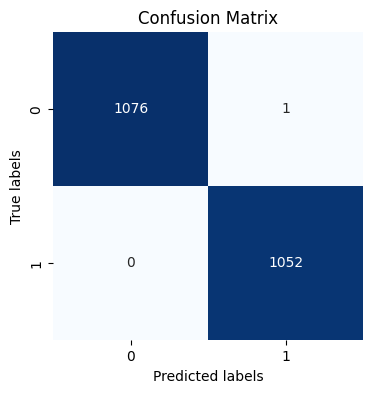

In [26]:
#random Forest classifier
model = RandomForestClassifier(n_estimators=7, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy1.append(accuracy)
print("Accuracy:", accuracy)
print("\nClassification Report:")
cr=classification_report(y_test, y_pred)
print(cr)
precision1.append(cr['precision'])
recall1.append(cr['recall'])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8924377642085486

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1077
           1       0.87      0.92      0.89      1052

    accuracy                           0.89      2129
   macro avg       0.89      0.89      0.89      2129
weighted avg       0.89      0.89      0.89      2129



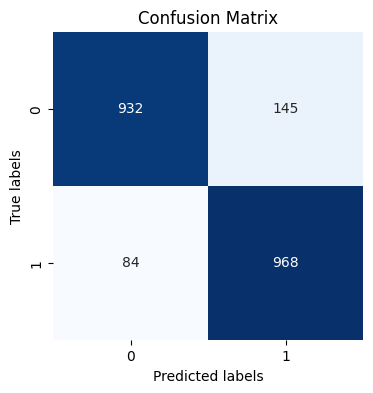

In [18]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.9967120713950212

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1077
           1       0.99      1.00      1.00      1052

    accuracy                           1.00      2129
   macro avg       1.00      1.00      1.00      2129
weighted avg       1.00      1.00      1.00      2129



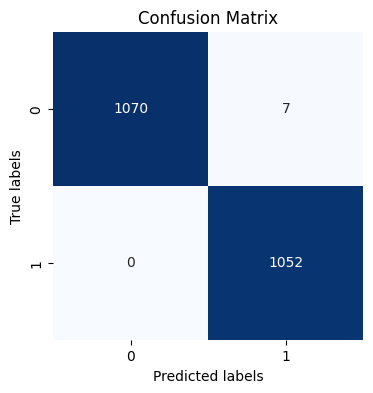

In [20]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_scaled,y_train)
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.8464067637388445

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1077
           1       0.82      0.88      0.85      1052

    accuracy                           0.85      2129
   macro avg       0.85      0.85      0.85      2129
weighted avg       0.85      0.85      0.85      2129



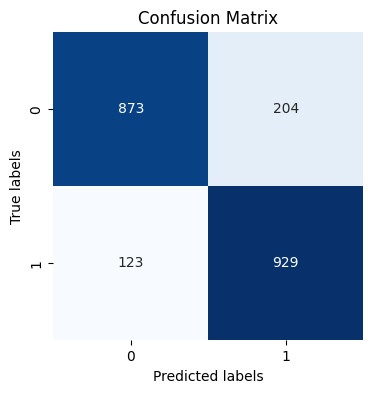

In [22]:
model=GaussianNB()
model.fit(X_train_scaled,y_train)
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()